# Project: Navigation by deep reinforcement learning
---


# Load the environment, brains and print some info



### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions.

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
file_name="Banana_Linux_NoVis/Banana.x86_64")
```

In [2]:
file_name="Banana_Linux_NoVis/Banana.x86_64"

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


## Brains

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.


In [3]:
# Load environment
env = UnityEnvironment(file_name)

# get brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.       

# Choose hyperparameters

In [4]:
N_EPISODES = 2000       # number of episodes to train the agent 
LR = 5e-4               # learning rate
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
UPDATE_EVERY = 4        # how often to update the network
MAX_T = 1000            # timesteps per episode
EPS_START = 1.0         # epsilon (greedy policy) start value
EPS_END = 0.01          # epsilon minimal value
EPS_DECAY = 0.995       # epsilon decay rate (per episode)

# Train the agent 

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.49
Episode 300	Average Score: 7.28
Episode 400	Average Score: 11.28
Episode 500	Average Score: 12.90
Episode 600	Average Score: 13.95
Episode 700	Average Score: 14.09
Episode 800	Average Score: 14.52
Episode 900	Average Score: 14.59
Episode 1000	Average Score: 15.62
Episode 1100	Average Score: 15.59
Episode 1200	Average Score: 15.87
Episode 1300	Average Score: 15.33
Episode 1400	Average Score: 15.90
Episode 1500	Average Score: 16.06
Episode 1600	Average Score: 15.47
Episode 1700	Average Score: 15.99
Episode 1800	Average Score: 16.02
Episode 1900	Average Score: 15.16
Episode 2000	Average Score: 14.99


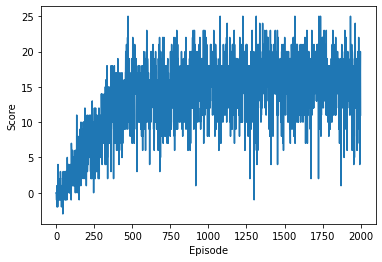

In [5]:
from agent import Agent
from dqn_learning import dqn_learning

# train
training_agent = Agent(state_size=brain.vector_observation_space_size,
              action_size=brain.vector_action_space_size,
              seed=0, gamma=GAMMA, tau=TAU,
              lr=LR, buffer_size=BUFFER_SIZE, batch_size=BATCH_SIZE, update_every=UPDATE_EVERY)

scores = dqn_learning(env, training_agent, n_episodes=N_EPISODES, max_t=MAX_T,
                        eps_start=EPS_START, eps_end=EPS_END, eps_decay=EPS_DECAY)

# close environment
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()


# Save the model weights

In [6]:
torch.save(training_agent.qnetwork_local.state_dict(), 'checkpoint.pth')

# Let the trained agent play and collect bananas. See its score
Make sure to:

1. interrupt and restart the kernel 
2. rerun the top cells including loading the environment

## 1. Load an experienced agent for playing

In [4]:
from playing_agent import Playing_Agent
# load playing agent
playing_agent = Playing_Agent()


## 2. Play

In [6]:
# set non train mode
env_info = env.reset(train_mode=False)[brain_name]

# initialize score 
score = 0                                      

# play
state = env_info.vector_observations[0]            # get the current state
while True:
    action = playing_agent.act(state)              # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # next state
   
    if done:                                       
        break
    
# print score when episode has finished

print("\nScore: {}".format(score))


Score: 19.0


## 3. Make sure to close the environment after playing

In [7]:
env.close()